In [56]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from collections import namedtuple
import math
import gdown
from queue import PriorityQueue
import time
from matplotlib.patches import Polygon
import heapq as hp
from sys import path
import sys


In [57]:
# resolution 1mx1m
gdown.download('https://drive.google.com/uc?export=download&id=1ufpAuAw8gXAlvDEnDxVNHuv_eOeACEqs')
# resolution 5mx5m
gdown.download('https://drive.google.com/uc?id=1ZICIK3FAoTnousekKUNxy6dUCGBffUOM&export=download')
# resolution 10mx10m
gdown.download('https://drive.google.com/uc?id=1qP52NQ1r5aYMlNWNPiu_ggqEJ4aA_EVJ&export=download')
# resolution 2mx2m
gdown.download('https://drive.google.com/uc?id=1FxbS7Q98y4-Q6vw6_tYfuHwpbUJEqTrS&export=download')


Downloading...
From: https://drive.google.com/uc?export=download&id=1ufpAuAw8gXAlvDEnDxVNHuv_eOeACEqs
To: /content/pgmimg_1.000000.pgm
100%|██████████| 6.24M/6.24M [00:00<00:00, 146MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZICIK3FAoTnousekKUNxy6dUCGBffUOM&export=download
To: /content/pgmimg_5.000000.pgm
100%|██████████| 249k/249k [00:00<00:00, 53.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qP52NQ1r5aYMlNWNPiu_ggqEJ4aA_EVJ&export=download
To: /content/pgmimg_10.000000.pgm
100%|██████████| 62.0k/62.0k [00:00<00:00, 29.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FxbS7Q98y4-Q6vw6_tYfuHwpbUJEqTrS&export=download
To: /content/pgmimg_2.000000.pgm
100%|██████████| 1.55M/1.55M [00:00<00:00, 128MB/s]


'pgmimg_2.000000.pgm'

In [58]:

class PerceptionMapper:
    def __init__(self, image, resolution):
        self.map = self.initialiseMap(image)
        self.size = self.map.shape
        self.defaultResolution = resolution

    def initialiseMap(self, testImage):
        env = np.ones(testImage.shape)
        for i in range(testImage.shape[0]):
            for j in range(testImage.shape[1]):
                if testImage[i][j] > 125:
                    env[i][j] = 0
        for i in range(testImage.shape[0]):
            for j in range(testImage.shape[1]):
                if testImage[i][j] < 125:            ## assigning some high values to this intensity
                    env[i][j] = 1000
        return env

In [59]:


class compute_astar_path():
  def __init__(self, map1, start, goal, grid):

 ## Initialising the required priority queue and other dictionaries

    self.grid = grid
    self.map = map1
    self.goal_final = goal
    self.r, self.c = map1.shape[0], map1.shape[1]
    self.goal = self.grid_to_index(goal, self.grid)
    self.start = self.grid_to_index(start, self.grid)
    # print("printing the zeroth node", self.start)
    # print(self.goal)
    self.n_vertices = self.r * self.c
    self.cost_data = {}
    self.nodes = {}
    self.store_to_path = {}
    self.creating_path = None
    self.pq = PriorityQueue()
    self.start_time = time.time()

## initializing all the cost values in the map with some big value and the start with 0
    for i in range(self.n_vertices):
      self.cost_data[i] = sys.maxsize
      self.nodes[i] = i
      self.store_to_path[i] = None
    self.cost_data[self.start] = 0

## Defining few functions to make the decision while using priority queue

  def __eq__(self, other):
    return self.index == other.index

  def __ne__(self, other):
      return self.index != other.index

  def __lt__(self, other):
      return self.index < other.index

  def __le__(self, other):
      return self.index <= other.index

  def __gt__(self, other):
      return self.index > other.index

  def __ge__(self, other):
      return self.index >= other.index

  def __repr__(self):
      return "{}".format(self.pos)


  def calculate_heuristic_cost(self, pos):
    hx, hy = self.index_to_grid(pos, self.grid)
    return np.sqrt((self.goal_final[0] - hx) ** 2 + (self.goal_final[1] - hy) ** 2)

  def travel_to_node_cost(self, node1, map_cal):
    nx, ny = self.index_to_grid(node1, self.grid)
    edj_cost = map_cal[nx][ny]
    return edj_cost

  def grid_to_index(self, position, grid):
    px = position[0]
    py = position[1]
    return position[0] * grid[1] + position[1]

  def index_to_grid(self, ind, grid):
    r = ind // grid[0]
    c = ind % grid[1]
    return [r, c]

  def find_child_nodes(self, parent):
    child_node_list = []
    child_up = parent - self.grid[1]
    child_left = parent - 1
    child_right = parent + 1
    child_bottom = parent + self.grid[1]
    if (child_up >= 0) and child_up in self.nodes:
      child_node_list.append(child_up)
    if child_left >= ((parent//self.grid[1])*self.grid[1]) and child_left in self.nodes:
      child_node_list.append(child_left)
    if child_right < ((parent//self.grid[1]+1)*self.grid[1]) and child_right in self.nodes:
      child_node_list.append(child_right)
    if child_bottom < (self.grid[0] * self.grid[1]) and child_bottom in self.nodes:
      child_node_list.append(child_bottom)

    return child_node_list

  def valid_move_check(self, child_node, grid):
    temp = False
    if (child_node >= 0)  or (child_node >= (child_node//self.grid[1])) or (child_node < (self.grid[0] * self.grid[1])) or (child_node < (child_node//self.grid[1]+1)): ### changed
      if child_node in self.nodes:
        temp = True
    return temp

  def compute_path(self, store_to_path, goal_node):
    # print("prinitng the computed path")
    goal_itr = self.goal
    path_traced_tuples = [goal_itr]

    while goal_itr != self.start:
      goal_itr = self.store_to_path[goal_itr]
      path_traced_tuples.append(goal_itr)

    path_traced_tuples.reverse()
    end_time = time.time()
    print("Total simulation time:", end_time - self.start_time)
    return path_traced_tuples


  def visualize_path(self, path, start_time, map):
    plt.imshow(map)
    coordinate = []
    for p in path:
      r, c = self.index_to_grid(p, self.grid)
      coordinate.append((c,r))
    s_coord = coordinate[0]
    for lindx in coordinate[1:]:
      g_coord = lindx
      # Create a red polygon to represent the path
      polygon = Polygon((s_coord, g_coord), closed=None, fill=None, edgecolor='red', linewidth=2)
      s_coord = g_coord

      # Add the red polygon to the plot
      plt.gca().add_patch(polygon)
    plt.show()


  def get_min_node(self):
    flag = 0
    indx = None

    while flag == 0:
      _, node_get = self.pq.get()
      if node_get in self.nodes:
        indx = node_get
        flag = 1
    return indx



  def astar_search(self):
    self.start_time = time.time()
    self.pq.put((0, self.start))
    task_done = False
    while len(self.nodes) > 0:
      parent_node = self.get_min_node()
      if parent_node == self.goal:
        task_done =True
        # print("Goal Reached")
        break
      self.nodes.pop(parent_node)
      child_list = self.find_child_nodes(parent_node)
      for child_node in child_list:
        travel_cost_c = self.cost_data[parent_node] + self.travel_to_node_cost(child_node, self.map)
        total_cost_c = travel_cost_c + self.calculate_heuristic_cost(child_node)
        if total_cost_c < self.cost_data[child_node]:
          self.cost_data[child_node] = total_cost_c
          self.store_to_path[child_node] = parent_node
          self.pq.put((total_cost_c, child_node))

    self.creating_path = self.compute_path(self.store_to_path, self.goal)
    sim_time = self.visualize_path(self.creating_path, self.start_time, self.map)
    return [self.creating_path, sim_time]



Scaled_starts [[22, 15], [43, 89]]
Scaled_goals [[23, 146], [96, 87], [30, 7], [27, 84]]
Map1 and 10x 10 resolution:
Start: [224, 158], Goal : [232, 1468]
Total simulation time: 0.2814972400665283


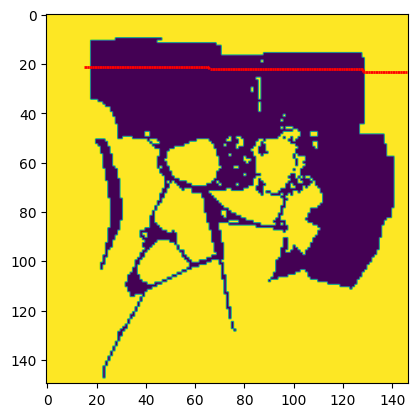

Map1 and 10x 10 resolution:
Start: [224, 158], Goal : [964, 870]
Total simulation time: 0.21944832801818848


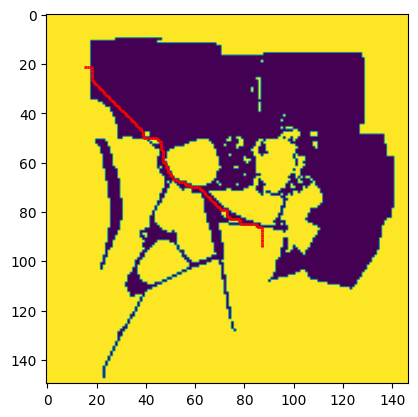

Map1 and 10x 10 resolution:
Start: [224, 158], Goal : [304, 72]
Total simulation time: 0.16786742210388184


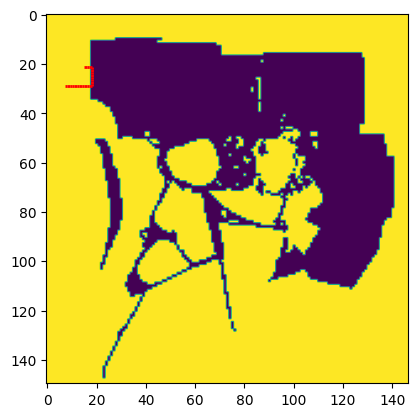

Map1 and 10x 10 resolution:
Start: [224, 158], Goal : [274, 840]
Total simulation time: 0.027334213256835938


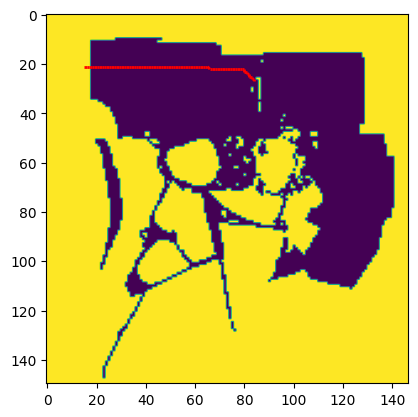

Map1 and 10x 10 resolution:
Start: [436, 892], Goal : [232, 1468]
Total simulation time: 0.2720682621002197


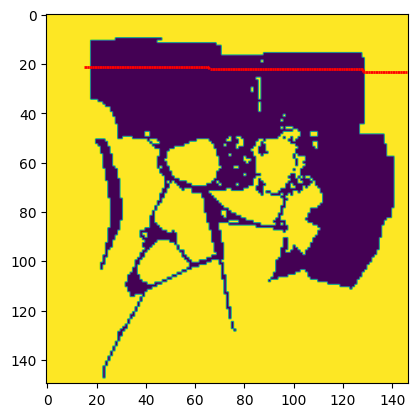

Map1 and 10x 10 resolution:
Start: [436, 892]], Goal : [964, 870]
Total simulation time: 0.2494969367980957


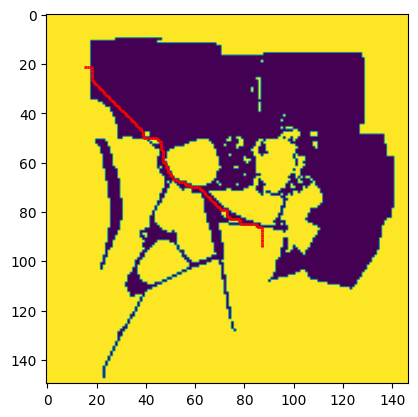

Map1 and 10x 10 resolution:
Start: [436, 892], Goal : [304, 72]
Total simulation time: 0.3124816417694092


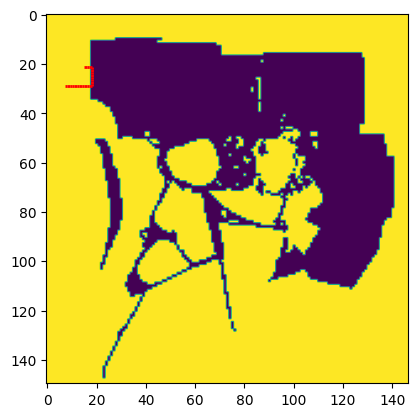

Map1 and 10x 10 resolution:
Start: [436, 892], Goal : [274, 840]
Total simulation time: 0.06997251510620117


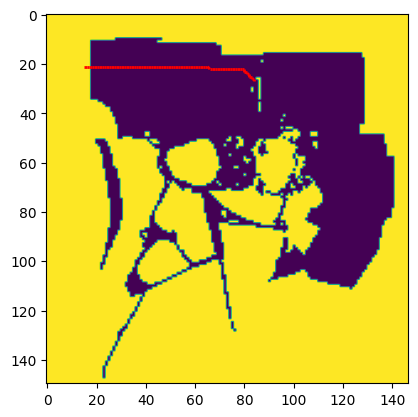

Map2 and 5x5 resolution:
Start: [224, 158], Goal : [232, 1468]
Total simulation time: 0.6329631805419922


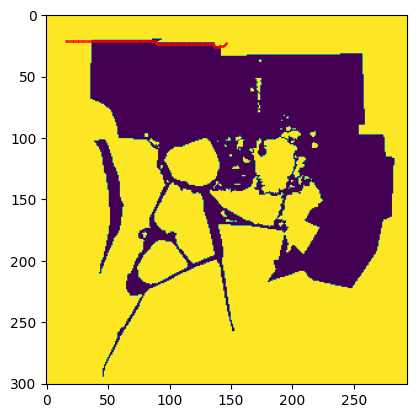

Map2 and 5x5 resolution:
Start: [224, 158], Goal : [964, 870]
Total simulation time: 0.13422679901123047


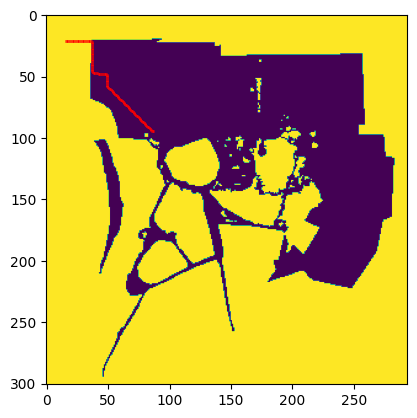

Map2 and 5x5 resolution:
Start: [224, 158], Goal : [304, 72]
Total simulation time: 0.007422208786010742


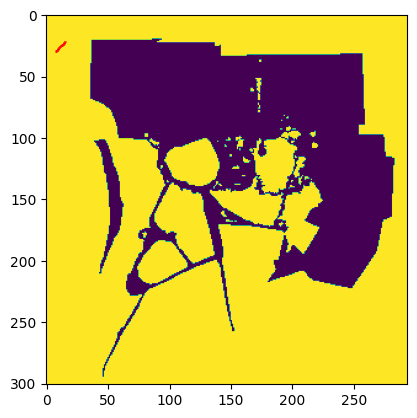

Map2 and 5x5 resolution:
Start: [224, 158], Goal : [274, 840]
Total simulation time: 0.0305328369140625


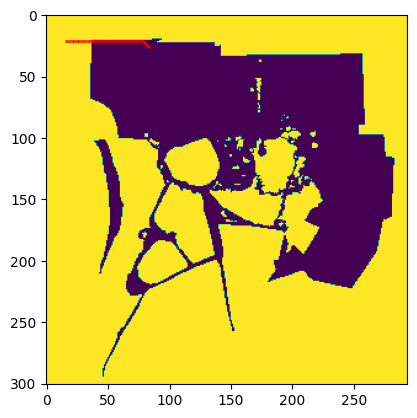

Map2 and 5 x 5 resolution:
Start: [436, 892], Goal : [232, 1468]
Total simulation time: 0.3518404960632324


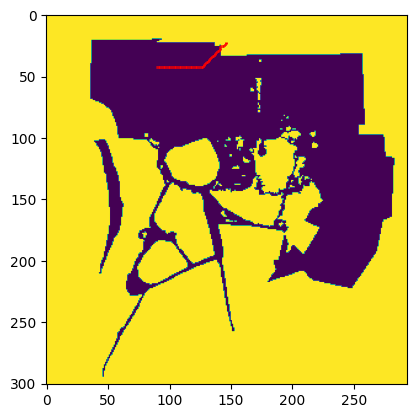

Map2 and 5 x 5 resolution:
Start: [436, 892]], Goal : [964, 870]
Total simulation time: 0.03411579132080078


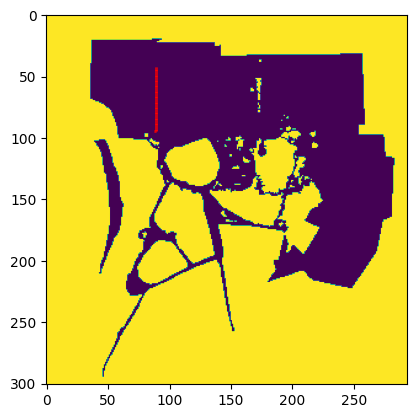

Map2 and 5 x 5 resolution:
Start: [436, 892], Goal : [304, 72]
Total simulation time: 0.6091117858886719


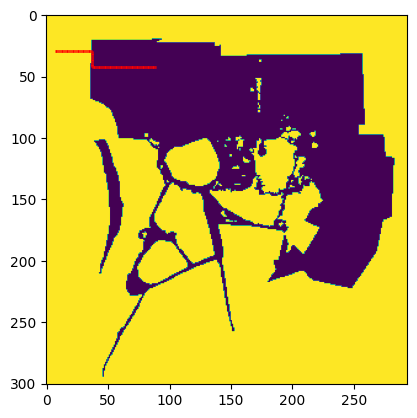

Map2 and 5 x 5 resolution:
Start: [436, 892], Goal : [274, 840]
Total simulation time: 0.006751060485839844


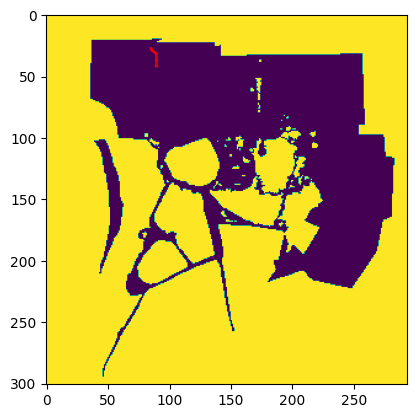

Map3 and 2x2 resolution:
Start: [224, 158], Goal : [232, 1468]
Total simulation time: 0.805680513381958


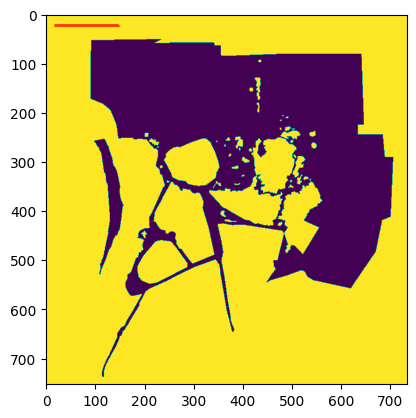

Map3 and 2x2 resolution:
Start: [224, 158], Goal : [964, 870]
Total simulation time: 0.345905065536499


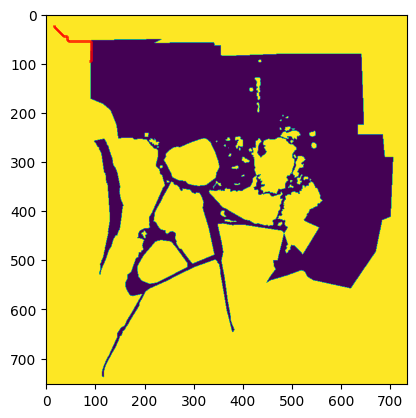

Map3 and 2x2 resolution:
Start: [224, 158], Goal : [304, 72]
Total simulation time: 0.010485649108886719


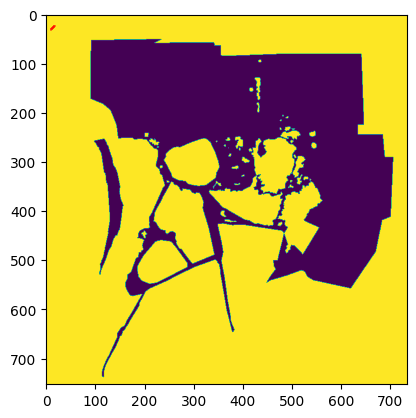

Map3 and 2x2 resolution::
Start: [224, 158], Goal : [274, 840]
Total simulation time: 0.08909940719604492


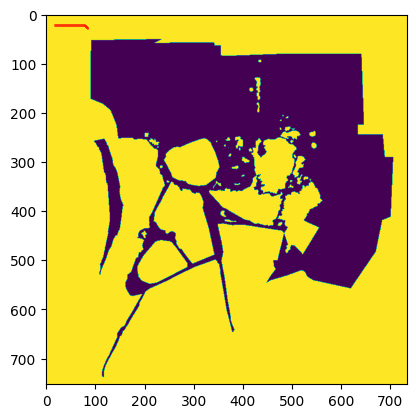

Map3 and 2x2 resolution:
Start: [436, 892], Goal : [232, 1468]
Total simulation time: 0.8964221477508545


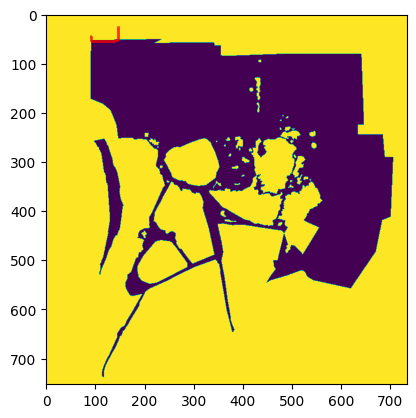

Map3 and 2x2 resolution:
Start: [436, 892]], Goal : [964, 870]
Total simulation time: 0.24205827713012695


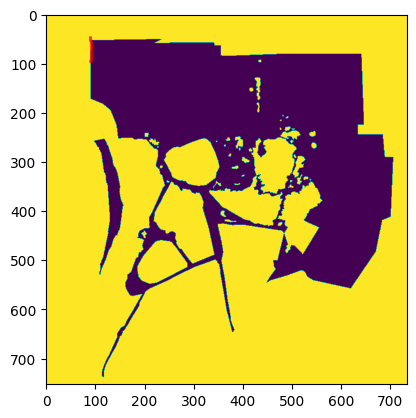

Map3 and 2x2 resolution:
Start: [436, 892], Goal : [304, 72]
Total simulation time: 2.2915282249450684


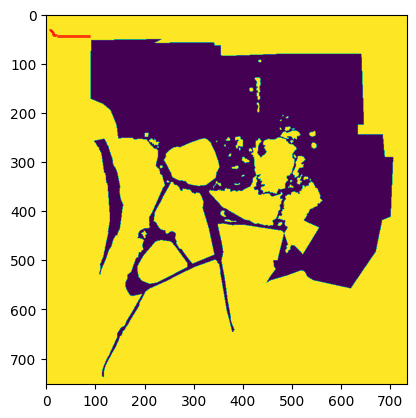

Map3 and 2x2 resolution::
Start: [436, 892], Goal : [274, 840]
Total simulation time: 0.14194631576538086


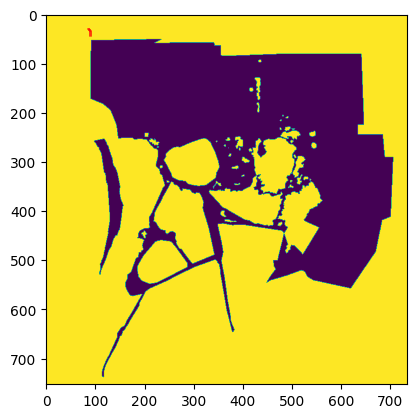

In [60]:
if __name__ == "__main__":

     # Map is represented by a numpy array, with origin at top left corner
  # Positive X-axis is towards right
  # Positive Y-axis is towards bottom
  #  ----------> X
  #  |
  #  |
  #  |
  #  |
  #  |
  #  |
  #  V Y
  # map[y][x] will give you the occupancy value of the cell

  # Map of Rellis Campus with resolution of 1pixel = 100mt^2 (10x10)
  testImage1 = img.imread('pgmimg_10.000000.pgm')
  env1 = PerceptionMapper(testImage1, 10)
  map1 = env1.map
  grid1 = map1.shape


  # Map of Rellis Campus with resolution of 1pixel = 25mt^2 (5x5)
  testImage2 = img.imread('pgmimg_5.000000.pgm')
  env2 = PerceptionMapper(testImage2, 5)
  map2 = env2.map
  grid2 = map2.shape

  # Map of Rellis Campus with resolution of 1pixel = 4mt^2 (2x2)
  testImage3 = img.imread('pgmimg_2.000000.pgm')
  env3 = PerceptionMapper(testImage3, 2)
  map3 = env3.map
  grid3 = map3.shape


 # Defining the original starting points and goals

  org_starts = [
      [224, 158],
      [436, 892]
  ]
  org_goals = [
      [232, 1468],
      [964, 870],
      [304, 72],
      [274, 840]
  ]

  scaled_starts_map1 = [ ]
  scaled_goals_map1=[]
  for s in org_starts:
    start1 = [int(s[0] /env1.defaultResolution ), int(s[1] / env1.defaultResolution)]
    scaled_starts_map1.append(start1)
  print("Scaled_starts", scaled_starts_map1)

  for g in org_goals:
    goal1 = [int(g[0] /env1.defaultResolution ), int(g[1] / env1.defaultResolution)]
    scaled_goals_map1.append(goal1)
  print("Scaled_goals", scaled_goals_map1)


# #                *************** getting data for 10x10 *****************
#### geeting results for map  for start goal [224, 158]  ##############
  print("Map1 and 10x 10 resolution:")
  print("Start: [224, 158], Goal : [232, 1468]")
  impliment_astar1_1 = compute_astar_path(map1, scaled_starts_map1[0], scaled_goals_map1[0], grid1)
  impliment_astar1_1.astar_search()


  print("Map1 and 10x 10 resolution:")
  print("Start: [224, 158], Goal : [964, 870]")
  impliment_astar1_2 = compute_astar_path(map1, scaled_starts_map1[0], scaled_goals_map1[1], grid1)
  impliment_astar1_2.astar_search()

  print("Map1 and 10x 10 resolution:")
  print("Start: [224, 158], Goal : [304, 72]")
  impliment_astar1_3 = compute_astar_path(map1, scaled_starts_map1[0], scaled_goals_map1[2], grid1)
  impliment_astar1_3.astar_search()

  print("Map1 and 10x 10 resolution:")
  print("Start: [224, 158], Goal : [274, 840]")
  impliment_astar1_4= compute_astar_path(map1, scaled_starts_map1[0], scaled_goals_map1[3], grid1)
  impliment_astar1_4.astar_search()


#### geeting results for map  for start goal [436, 892]   #####
  print("Map1 and 10x 10 resolution:")
  print("Start: [436, 892], Goal : [232, 1468]")
  impliment_astar1_5 = compute_astar_path(map1, scaled_starts_map1[0], scaled_goals_map1[0], grid1)
  impliment_astar1_5.astar_search()

  print("Map1 and 10x 10 resolution:")
  print("Start: [436, 892]], Goal : [964, 870]")
  impliment_astar1_6 = compute_astar_path(map1, scaled_starts_map1[0], scaled_goals_map1[1], grid1)
  impliment_astar1_6.astar_search()

  print("Map1 and 10x 10 resolution:")
  print("Start: [436, 892], Goal : [304, 72]")
  impliment_astar1_7 = compute_astar_path(map1, scaled_starts_map1[0], scaled_goals_map1[2], grid1)
  impliment_astar1_7.astar_search()

  print("Map1 and 10x 10 resolution:")
  print("Start: [436, 892], Goal : [274, 840]")
  impliment_astar1_8= compute_astar_path(map1, scaled_starts_map1[0], scaled_goals_map1[3], grid1)
  impliment_astar1_8.astar_search()



 #              *************** getting data for 5x5 *****************
#### geeting results for map  for start goal [224, 158]   #####
  print("Map2 and 5x5 resolution:")
  print("Start: [224, 158], Goal : [232, 1468]")
  impliment_astar2_1 = compute_astar_path(map2, scaled_starts_map1[0], scaled_goals_map1[0], grid2)
  impliment_astar2_1.astar_search()

  print("Map2 and 5x5 resolution:")
  print("Start: [224, 158], Goal : [964, 870]")
  impliment_astar2_2 = compute_astar_path(map2, scaled_starts_map1[0], scaled_goals_map1[1], grid2)
  impliment_astar2_2.astar_search()

  print("Map2 and 5x5 resolution:")
  print("Start: [224, 158], Goal : [304, 72]")
  impliment_astar2_3 = compute_astar_path(map2, scaled_starts_map1[0], scaled_goals_map1[2], grid2)
  impliment_astar2_3.astar_search()

  print("Map2 and 5x5 resolution:")
  print("Start: [224, 158], Goal : [274, 840]")
  impliment_astar2_4= compute_astar_path(map2, scaled_starts_map1[0], scaled_goals_map1[3], grid2)
  impliment_astar2_4.astar_search()


#### geeting results for map  for start goal [436, 892]   #####
  print("Map2 and 5 x 5 resolution:")
  print("Start: [436, 892], Goal : [232, 1468]")
  impliment_astar2_5 = compute_astar_path(map2, scaled_starts_map1[1], scaled_goals_map1[0], grid2)
  impliment_astar2_5.astar_search()

  print("Map2 and 5 x 5 resolution:")
  print("Start: [436, 892]], Goal : [964, 870]")
  impliment_astar2_6 = compute_astar_path(map2, scaled_starts_map1[1], scaled_goals_map1[1], grid2)
  impliment_astar2_6.astar_search()

  print("Map2 and 5 x 5 resolution:")
  print("Start: [436, 892], Goal : [304, 72]")
  impliment_astar2_7 = compute_astar_path(map2, scaled_starts_map1[1], scaled_goals_map1[2], grid2)
  impliment_astar2_7.astar_search()

  print("Map2 and 5 x 5 resolution:")
  print("Start: [436, 892], Goal : [274, 840]")
  impliment_astar2_8= compute_astar_path(map2, scaled_starts_map1[1], scaled_goals_map1[3], grid2)
  impliment_astar2_8.astar_search()







 #              *************** getting data for 2x2 *****************
#### geeting results for map  for start goal [224, 158]   #####
  print("Map3 and 2x2 resolution:")
  print("Start: [224, 158], Goal : [232, 1468]")
  impliment_astar3_1 = compute_astar_path(map3, scaled_starts_map1[0], scaled_goals_map1[0], grid3)
  impliment_astar3_1.astar_search()

  print("Map3 and 2x2 resolution:")
  print("Start: [224, 158], Goal : [964, 870]")
  impliment_astar3_2 = compute_astar_path(map3, scaled_starts_map1[0], scaled_goals_map1[1], grid3)
  impliment_astar3_2.astar_search()

  print("Map3 and 2x2 resolution:")
  print("Start: [224, 158], Goal : [304, 72]")
  impliment_astar3_3 = compute_astar_path(map3, scaled_starts_map1[0], scaled_goals_map1[2], grid3)
  impliment_astar3_3.astar_search()

  print("Map3 and 2x2 resolution::")
  print("Start: [224, 158], Goal : [274, 840]")
  impliment_astar3_4= compute_astar_path(map3, scaled_starts_map1[0], scaled_goals_map1[3], grid3)
  impliment_astar3_4.astar_search()


#### geeting results for map  for start goal [436, 892]   #####
  print("Map3 and 2x2 resolution:")
  print("Start: [436, 892], Goal : [232, 1468]")
  impliment_astar3_5 = compute_astar_path(map3, scaled_starts_map1[1], scaled_goals_map1[0], grid3)
  impliment_astar3_5.astar_search()

  print("Map3 and 2x2 resolution:")
  print("Start: [436, 892]], Goal : [964, 870]")
  impliment_astar3_6 = compute_astar_path(map3, scaled_starts_map1[1], scaled_goals_map1[1], grid3)
  impliment_astar3_6.astar_search()

  print("Map3 and 2x2 resolution:")
  print("Start: [436, 892], Goal : [304, 72]")
  impliment_astar3_7 = compute_astar_path(map3, scaled_starts_map1[1], scaled_goals_map1[2], grid3)
  impliment_astar3_7.astar_search()

  print("Map3 and 2x2 resolution::")
  print("Start: [436, 892], Goal : [274, 840]")
  impliment_astar3_8= compute_astar_path(map3, scaled_starts_map1[1], scaled_goals_map1[3], grid3)
  impliment_astar3_8.astar_search()





